# Coding Assignment 5

In [50]:
#Necessary libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [51]:
#Laod the dataset
file = os.getcwd() + "/blueprints-text/data/jdt-bugs-dataset/eclipse_jdt.csv.gz" ### real location
df = pd.read_csv(file)

In [52]:
df = df[['Title','Description','Priority']] ### Remove other attributes
df = df.dropna()

In [53]:
df['text'] = df['Title'] + ' ' + df['Description'] ### Combine title and description into text
df = df.drop(columns=['Title','Description']) ### Drop title and description columns

# 1. Compute the distribution of classes in the training data on the "Priority" label obtained from df in TextClassification.ipynb. Is this distribution close to that of df?

In [56]:
"""
Compute probability of each priority level

""" 
P1_df = len(df[df["Priority"]=='P1'])/len(df) #Probability of Priority label 1
P2_df = len(df[df["Priority"]=='P2'])/len(df) #Probability of Priority label 2
P3_df = len(df[df["Priority"]=='P3'])/len(df) #Probability of Priority label 3
P4_df = len(df[df["Priority"]=='P4'])/len(df) #Probability of Priority label 4
P5_df = len(df[df["Priority"]=='P5'])/len(df) #Probability of Priority label 5

"""
ensure the probability adds up to 1

"""
df_Priority = np.array ([P1_df, P2_df, P3_df, P4_df, P5_df]) 
n_df = df_Priority.shape[0]
index_df = np.arange(n_df)
assert sum(df_Priority) == 1.0

In [57]:
"""
Split the dataset (df): 80% as Trainning Data and 20% as Test Data
"""
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Priority'],
                                                    test_size=0.2, ### 80-20 train-test split
                                                    random_state=42,
                                                    stratify=df['Priority'])

In [58]:
"""
Compute probability of each priority level on Y_train (i.e: df_train["Priority"])

""" 

P1_Y_train = len(Y_train[Y_train=='P1'])/len(Y_train) #Probability of Priority label 1
P2_Y_train = len(Y_train[Y_train=='P2'])/len(Y_train) #Probability of Priority label 2
P3_Y_train = len(Y_train[Y_train=='P3'])/len(Y_train) #Probability of Priority label 3
P4_Y_train = len(Y_train[Y_train=='P4'])/len(Y_train) #Probability of Priority label 4
P5_Y_train = len(Y_train[Y_train=='P5'])/len(Y_train) #Probability of Priority label 5

"""
ensure the probability adds up to 1

"""
Y_train_priority = np.array([P1_Y_train, P2_Y_train, P3_Y_train, P4_Y_train, P5_Y_train])

n_train = Y_train_priority.shape[0]
index_train = np.arange(n_train)
assert sum(Y_train_priority) == 1.0

KL-divergence of p to q over a set of outcomes is defined by 
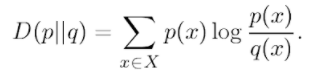

In [59]:
from math import log2
 
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

In [60]:
KL_imbalanced = kl_divergence(df_Priority, Y_train_priority)

print('KL(P || Q) of original dataset: %.8f' % KL_imbalanced)

KL(P || Q) of original dataset: 0.00000002


Comment #1: KL divergence on df["Priority"] and df_train["Priority] is closer to zero so we can say that this two probability distributions are close to each other

# 2. Compute the distrubiton of classes in the training data on the "Priority" label obtained from df_balanced in TextClassfication.ipynb. Is this distribution close to that of df_new? 

In [61]:
"""
Balance the dataset

"""

# Sample 4000 bug reports with priority P3 
df_P3 = df[df['Priority'] == 'P3'].sample(n=4000, random_state=123)

# Create a separate dataframe containing all other bug reports
df_Rest = df[df['Priority'] != 'P3']

# Concatenate the two dataframes to create the new balanced bug reports dataset
df_balanced = pd.concat([df_Rest, df_P3])

# Loading the balanced dataframe

df_new = df_balanced[['text', 'Priority']]
df_new = df_new.dropna()


In [62]:
"""
Compute probability of each priority level on balanced dataset

""" 
P1_df_bl = len(df_new[df_new["Priority"]=='P1'])/len(df_new) #Probability of Priority label 1
P2_df_bl = len(df_new[df_new["Priority"]=='P2'])/len(df_new) #Probability of Priority label 2
P3_df_bl = len(df_new[df_new["Priority"]=='P3'])/len(df_new) #Probability of Priority label 3
P4_df_bl = len(df_new[df_new["Priority"]=='P4'])/len(df_new) #Probability of Priority label 4
P5_df_bl = len(df_new[df_new["Priority"]=='P5'])/len(df_new) #Probability of Priority label 5

In [63]:
"""
ensure the probability adds up to 1

"""
df_new_Priority = np.array ([P1_df_bl, P2_df_bl, P3_df_bl, P4_df_bl, P5_df_bl]) 
n_df_bl = df_new_Priority.shape[0]
index_df_bl = np.arange(n_df_bl)
assert sum(df_new_Priority) == 1.0

In [64]:

# Train-Test Split
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(df_new['text'],
                                                    df_new['Priority'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df_new['Priority'])

In [65]:
"""
Compute probability of each priority level on Y_train (i.e: df_train["Priority"])

""" 

P1_Y_train_bl = len(Y_train_new[Y_train_new=='P1'])/len(Y_train_new) #Probability of Priority label 1
P2_Y_train_bl = len(Y_train_new[Y_train_new=='P2'])/len(Y_train_new) #Probability of Priority label 2
P3_Y_train_bl = len(Y_train_new[Y_train_new=='P3'])/len(Y_train_new) #Probability of Priority label 3
P4_Y_train_bl = len(Y_train_new[Y_train_new=='P4'])/len(Y_train_new) #Probability of Priority label 4
P5_Y_train_bl = len(Y_train_new[Y_train_new=='P5'])/len(Y_train_new) #Probability of Priority label 5

"""
ensure the probability adds up to 1

"""
Y_train_new_priority = np.array([P1_Y_train_bl, P2_Y_train_bl, P3_Y_train_bl, P4_Y_train_bl, P5_Y_train_bl])

n_train_bl = Y_train_new_priority.shape[0]
index_train_bl = np.arange(n_train_bl)
assert sum(Y_train_new_priority) == 1.0

In [66]:
KL_balanced = kl_divergence(df_new_Priority, Y_train_new_priority)
print('KL(P || Q) on Balanced dataset: %.8f' % KL_balanced )


KL(P || Q) on Balanced dataset: 0.00000011


Comment #2: KL divergence on df_balanced["Priority"] and df_balanced_train["Priority] is closer to zero so we can say that this two probability distributions are close to each other

# 3. What conclusions can you draw about the training set selections against the underlying datasets from the label-distribution point of view?

In [67]:
KL_imbalanced < KL_balanced

True

Comment #3: We know that the lower the KL divergence value, the better we have matched the true distribution with our approximation. Since the KL divergence value for the imbalanced data is lower than the balanced dataset, we can conclude that information loss in imbalanced data is less than the balanced data so df will give better approximation than df_new.